In [1]:
import numpy as np
import matplotlib.pyplot as plt

### States, actions and parameters of the problem

In [2]:
states = [1,2,3,4,5,6,7,8,9]
actions = ['droite', 'haut','gauche','bas']

# Hyperparameters
alpha = 0.1 #learning rate
gamma = 0.6 #discount factor
epsilon = 0.1 #probability of making a greedy action


### Framework deterministic scenario

In [3]:
def transition_matrix(u):
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
        
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
        
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])    
    return tr

def transition(s, u):
    tr = transition_matrix(u)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def  env_step(s, u):
    next_state = transition(s,u)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

### Framework windy scenario

In [4]:
w = 'gauche'#provenance du vent
f = 0.1 #force du vent

def transition_matrix_wind(u, wind, force):
        
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])
    
    #adding a wind component:
    if wind == 'droite':
        mini_wind = np.array([[1-force,force,0],[0,1-force,force],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'gauche':
        mini_wind = np.array([[1,0,0],[force,1-force,0],[0,force,1-force]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'haut':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[np.identity(3), zeros_block, zeros_block], [mini_wind1,mini_wind2, zeros_block],[zeros_block,mini_wind1,mini_wind2]])
    if wind == 'bas':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind2,mini_wind1, zeros_block],[zeros_block,mini_wind2,mini_wind1], [zeros_block, zeros_block,np.identity(3)]])
        
    return (np.dot(tr, wind_mat))

def transition_wind(s, u, wind, force):
    tr = transition_matrix_wind(u, wind, force)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def env_step_wind(s, u, wind, force):
    next_state = transition_wind(s, u, wind, force)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

### Framework very windy (random) scenario

In [5]:
matrix1 = np.random.rand(len(states),len(states))
matrix2 = np.random.rand(len(states),len(states))
matrix3 = np.random.rand(len(states),len(states))
matrix4 = np.random.rand(len(states),len(states))

matrix1 = matrix1/matrix1.sum(axis=1)[:,None]
matrix2 = matrix2/matrix2.sum(axis=1)[:,None]
matrix3 = matrix3/matrix3.sum(axis=1)[:,None]
matrix4 = matrix4/matrix4.sum(axis=1)[:,None]

def transition_matrix_random(u, m1, m2,m3,m4):
    if u == 'gauche':
        tr = m1
    if u == 'droite':
        tr = m2
    if u == 'haut':
        tr = m3
    if u == 'bas':
        tr = m4
    return(tr)

def transition_random(s, u, m1, m2,m3,m4):
    tr = transition_matrix_random(u, m1, m2,m3,m4)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def env_step_random(s, u, m1, m2,m3,m4):
    next_state = transition_random(s, u, m1, m2,m3,m4)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

## Computing optimal values using value iteration algorithm

### $Q^*$ deterministic scenario

In [6]:
q_dp = np.zeros([len(states),len(actions)])
q_dp[2]=10
q_dp[3]=-10


for t in range(100, 0,-1):
    q_dp_new = q_dp.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix(u)
            ligne_i = trmat[i]
            q_max = np.max(q_dp, axis = 1)
            q_dp_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp = q_dp_new

print(actions)
q_dp

['droite', 'haut', 'gauche', 'bas']


array([[  9.   ,   5.4  ,   5.4  ,  -2.76 ],
       [ 15.   ,   9.   ,   5.4  ,   5.4  ],
       [ 25.   ,  25.   ,  19.   ,  19.   ],
       [ -4.6  ,  -4.6  , -12.76 ,  -8.056],
       [  9.   ,   9.   ,  -2.76 ,   3.24 ],
       [  9.   ,  15.   ,   5.4  ,   5.4  ],
       [  3.24 ,  -2.76 ,   1.944,   1.944],
       [  5.4  ,   5.4  ,   1.944,   3.24 ],
       [  5.4  ,   9.   ,   3.24 ,   5.4  ]])

### $Q^*$ windy scenario

In [7]:
q_dp_wind = np.zeros([len(states),len(actions)])
q_dp_wind[2]=10
q_dp_wind[3]=-10


for t in range(100, 0,-1):
    q_dp_wind_new = q_dp_wind.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_wind(u,w,f)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_wind, axis = 1)
            q_dp_wind_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_wind = q_dp_wind_new

print(actions)
q_dp_wind

['droite', 'haut', 'gauche', 'bas']


array([[  7.75531915,   4.65319149,   4.65319149,  -3.20808511],
       [ 13.5       ,   7.75531915,   4.65319149,   3.86706383],
       [ 23.5       ,  23.5       ,  17.75531915,  17.75531915],
       [ -6.13293617,  -5.34680851, -13.20808511,  -8.46438361],
       [  7.75531915,   7.75531915,  -3.20808511,   2.55936064],
       [  7.75531915,  13.5       ,   3.86706383,   4.45518334],
       [  2.55936064,  -3.20808511,   1.53561639,   1.53561639],
       [  4.45518334,   3.86706383,   1.53561639,   2.55936064],
       [  4.45518334,   7.75531915,   2.55936064,   4.45518334]])

### $Q^*$ very windy (random) scenario

In [8]:
q_dp_random = np.zeros([len(states),len(actions)])
q_dp_random[2]=10
q_dp_random[3]=-10


for t in range(100, 0,-1):
    q_dp_random_new = q_dp_random.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_random(u, matrix1, matrix2, matrix3, matrix4)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_random, axis = 1)
            q_dp_random_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_random = q_dp_random_new

print(actions)
q_dp_random

['droite', 'haut', 'gauche', 'bas']


array([[ 1.19008168,  1.70895026,  0.04532408,  0.15799265],
       [ 0.83285972,  1.40354919,  1.19020151,  0.97417887],
       [11.21590925, 11.39394987, 10.16950472, 12.04873008],
       [-9.24034074, -8.51214816, -9.26221093, -9.64650157],
       [ 1.41549335,  0.80985885,  0.42911438,  1.12159011],
       [ 1.11552316,  0.61624191,  0.85618271, -0.13421298],
       [ 1.81462131,  2.43736524,  0.45682347,  0.89085348],
       [ 0.51388199,  0.44897719,  0.74666606,  1.11549594],
       [ 1.27036384,  0.49354823,  1.53082982,  1.8377453 ]])

## Comparing number of iterations vs error

### Error in deterministic scenario

In [9]:
time_steps = np.logspace(1, 5, 10, endpoint=True).astype(int)
error = np.zeros(len(time_steps))

for k in range(len(time_steps)):
    print(k)
    time = time_steps[k]
    q_table_wind = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_wind[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_wind(s, u, w, f)
            next_state_index = next_state - 1

            old_value = q_table_wind[state_index, action_index]
            next_max = np.max(q_table_wind[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_wind[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error[k] = (np.mean((q_table_wind-q_dp_wind)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
Training finished.



### Error in windy scenario

In [10]:
time_steps_wind = np.logspace(1, 5, 10, endpoint=True).astype(int)
error_wind = np.zeros(len(time_steps))

for k in range(len(time_steps_wind)):
    print(k)
    time = time_steps_windy[k]
    q_table_wind = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_wind[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_wind(s, u, w, f)
            next_state_index = next_state - 1

            old_value = q_table_wind[state_index, action_index]
            next_max = np.max(q_table_wind[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_wind[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error_wind[k] = (np.mean((q_table_wind-q_dp_wind)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
Training finished.



### Error in very windy (random) scenario

In [11]:
time_steps_random = np.logspace(1, 6, 10, endpoint=True).astype(int)
error_random = np.zeros(len(time_steps))

for k in range(len(time_steps_random)):
    print(k)
    time = time_steps_random[k]
    q_table_random = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_random[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_random(s, u, matrix1, matrix2, matrix3, matrix4)
            next_state_index = next_state - 1

            old_value = q_table_random[state_index, action_index]
            next_max = np.max(q_table_random[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_random[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error_random[k] = (np.mean((q_table_random-q_dp_random)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
Training finished.



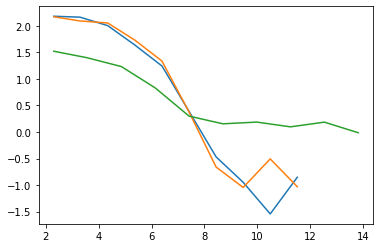

In [13]:
plt.plot(np.log(time_steps), np.log(error))
plt.plot(np.log(time_steps_wind), np.log(error_wind))
plt.plot(np.log(time_steps_random), np.log(error_random))
